# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 3. Сравнение оценок и эффективные оценки
### Дедлайн --- 13 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 15 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [1]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Задача 1

Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [2]:
color_for_normal=sns.color_palette("colorblind")[0]
color_for_laplace=sns.color_palette("colorblind")[1]
color_for_cauchy=sns.color_palette("colorblind")[2]

N=500

norm_distr = sps.norm()
laplacian_distr = sps.laplace()
cauchy_distr = sps.cauchy()
np.random.seed(2020)

sample_norm = norm_distr.rvs(int(N))
sample_lapl = laplacian_distr.rvs(int(N))
sample_cauchy = cauchy_distr.rvs(int(N))

Постройте график плотности распределения для всех трех распределений на одних осях.

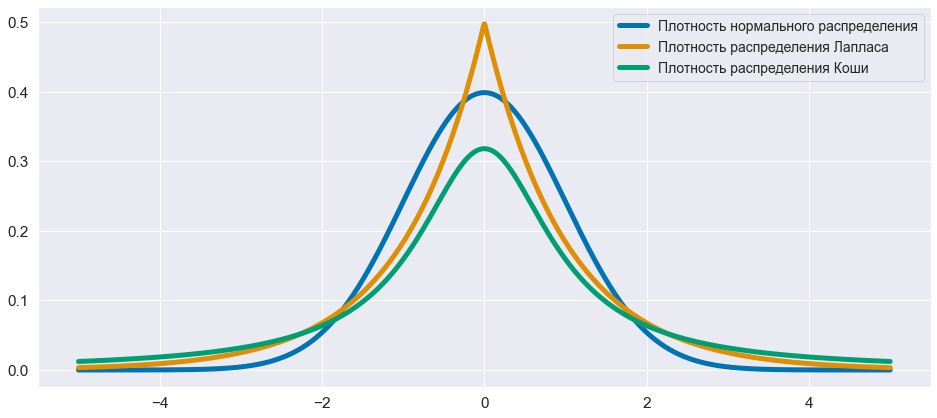

In [3]:
grid = np.linspace(-5, 5, 1000) 
plt.figure(figsize=(16, 7))
plt.plot(grid, norm_distr.pdf(grid), color=color_for_normal, 
         lw=5, label='Плотность нормального распределения')
plt.plot(grid, laplacian_distr.pdf(grid), color=color_for_laplace, 
         lw=5, label='Плотность распределения Лапласа')
plt.plot(grid, cauchy_distr.pdf(grid), color=color_for_cauchy, 
         lw=5, label='Плотность распределения Коши')
plt.legend(fontsize=14, loc=1)
plt.show()

Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:** сложнее найти значение математического ожидания по выборке для распределения Коши, т.к. у него плотность вероятности в больших по модулю числах наиболее большая среди этих распределений, а значит, выше вероятность получить в выборке выброс, который будет существенно влиять на среднеее значение элементов выборки.

Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [18]:
import math

def truncated_mean(sample, alpha=0.3):
    sample = sorted(sample)
    alph = int(len(sample)*alpha)
    return np.mean(sample[alph:-alph])

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [5]:
from scipy.integrate import quad

def asymp_var(distr, alpha):
    return 2 * (quad(lambda x: x * x * distr.pdf(x), 0, distr.ppf(1-alpha))[0] + alpha * distr.ppf(1-alpha) * distr.ppf(1-alpha)) / ((1 - 2 * alpha) * (1 - 2 * alpha))

Постройте графики для фсимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

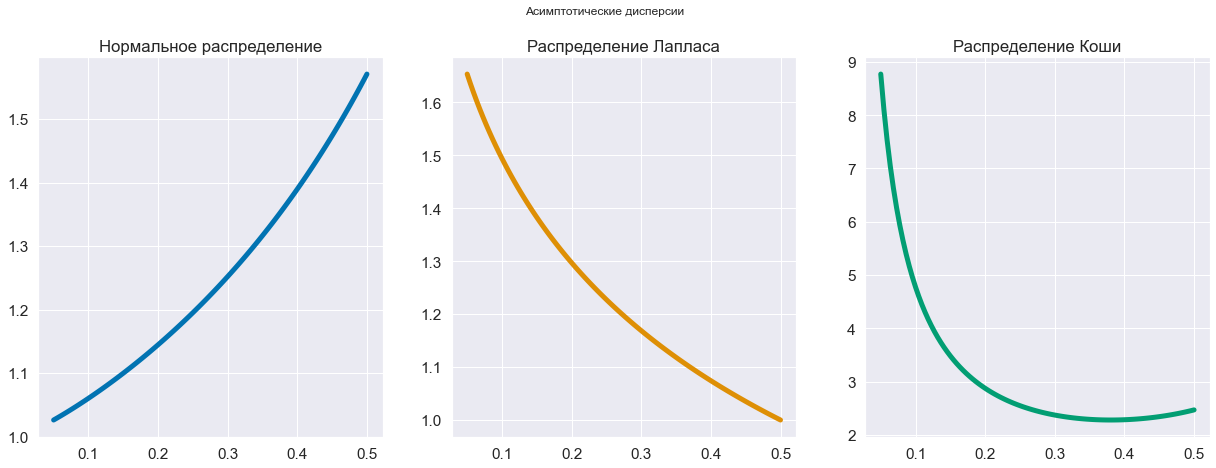

In [81]:
quad(lambda x: x * x * norm_distr.pdf(x), 0, norm_distr.ppf(1-0.05))[0]

alpha_grid = np.linspace(0.05, 0.49999, 100)

fig, ax = plt.subplots(1, 3, figsize=(21,7))
ax[0].set_title('Нормальное распределение')
ax[1].set_title('Распределение Лапласа')
ax[2].set_title('Распределение Коши')
fig.suptitle("Асимптотические дисперсии")
norm_var = [asymp_var(norm_distr, alpha_grid[i]) for i in range(100)]
lapl_var = [asymp_var(laplacian_distr, alpha_grid[i]) for i in range(100)]
cauchy_var = [asymp_var(cauchy_distr, alpha_grid[i]) for i in range(100)]
ax[0].plot(alpha_grid, norm_var, color=color_for_normal, lw=5)
ax[1].plot(alpha_grid, lapl_var, color=color_for_laplace, lw=5)
ax[2].plot(alpha_grid, cauchy_var, color=color_for_cauchy, lw=5)
plt.show()

Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

**Ответ:** первый график показывает, что для оценки матожидания нормального распределения лучше использовать обычное, а не усеченное среднее. Так происходит из-за того, что вероятность выбросов в нормальном распределении очень мала, но при этом не высока вероятность попасть в математическое ожидание, поэтому медиана хуже показывает математическое ожидание.
Второй график показывает, что для оценки матожидания распределения Лапласа лучше использовать медиану. Так происходит из-за того, что вероятность выбросов не очень велика, но все же больше, чем в нормальном распределении, и к тому же крайне высока вероятность попасть ровно в матожидание
Третий график показывает, что точно не стоит использовать среднее для оценки матожидания в распределении Коши, при этом усеченное среднее порядка примерно 0.35 оказывается лучше, чем медиана. Так происходит из-за того, что высока вероятность выбросов, и при этом не высока вероятность поасть ровно в математическое ожидание

Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [23]:
estimate_norm_1 = sample_norm.cumsum() / np.arange(1, N + 1)
estimate_norm_2 = [truncated_mean(sample_norm[:i], alpha = 0.35) for i in range(1,N + 1)]
estimate_norm_3 = [np.median(sample_norm[:i]) for i in range(1,N + 1)]
estimate_lapl_1 = sample_lapl.cumsum() / np.arange(1, N + 1)
estimate_lapl_2 = [truncated_mean(sample_lapl[:i], alpha = 0.35) for i in range(1,N + 1)]
estimate_lapl_3 = [np.median(sample_lapl[:i]) for i in range(1,N + 1)]
estimate_cauchy_1 = sample_cauchy.cumsum() / np.arange(1, N + 1)
estimate_cauchy_2 = [truncated_mean(sample_cauchy[:i], alpha = 0.35) for i in range(1, N + 1)]
estimate_cauchy_3 = [np.median(sample_cauchy[:i]) for i in range(1, N + 1)]


**Нормальное распределение**

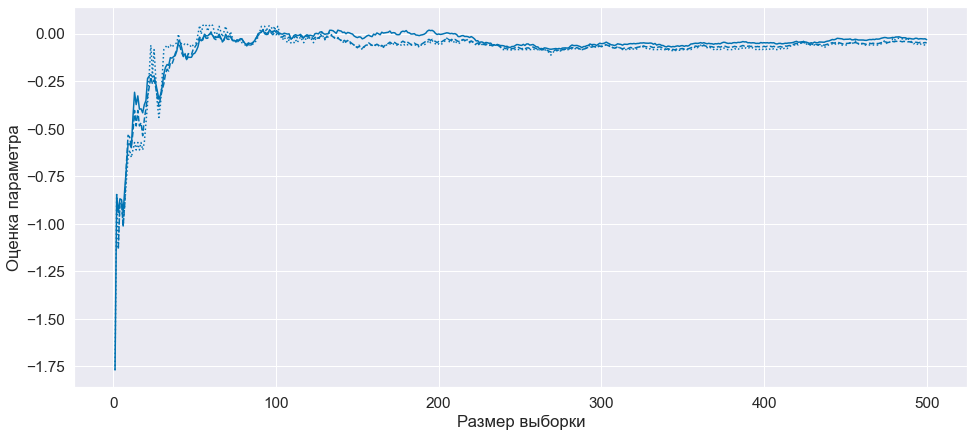

In [82]:
grid = np.linspace(1, N, N) 
plt.figure(figsize=(16, 7))
plt.plot(grid, estimate_norm_1, color=color_for_normal)
plt.plot(grid, estimate_norm_2, color=color_for_normal, linestyle="--")
plt.plot(grid, estimate_norm_3, color=color_for_normal, linestyle=":")
plt.xlabel("Размер выборки")
plt.ylabel("Оценка параметра")
plt.show()

**Распределение Лапласа**

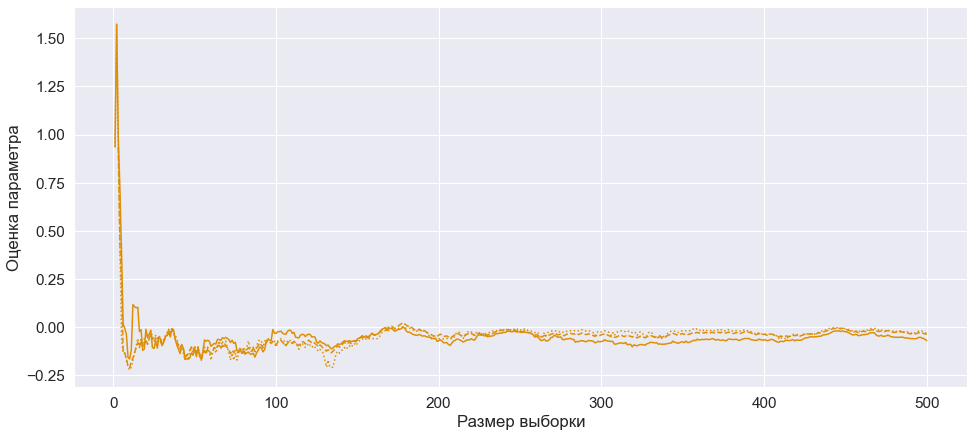

In [83]:
grid = np.linspace(1, N, N) 
plt.figure(figsize=(16, 7))
plt.plot(grid, estimate_lapl_1, color=color_for_laplace)
plt.plot(grid, estimate_lapl_2, color=color_for_laplace, linestyle="--")
plt.plot(grid, estimate_lapl_3, color=color_for_laplace, linestyle=":")
plt.xlabel("Размер выборки")
plt.ylabel("Оценка параметра")
plt.show()

**Распределение Коши**

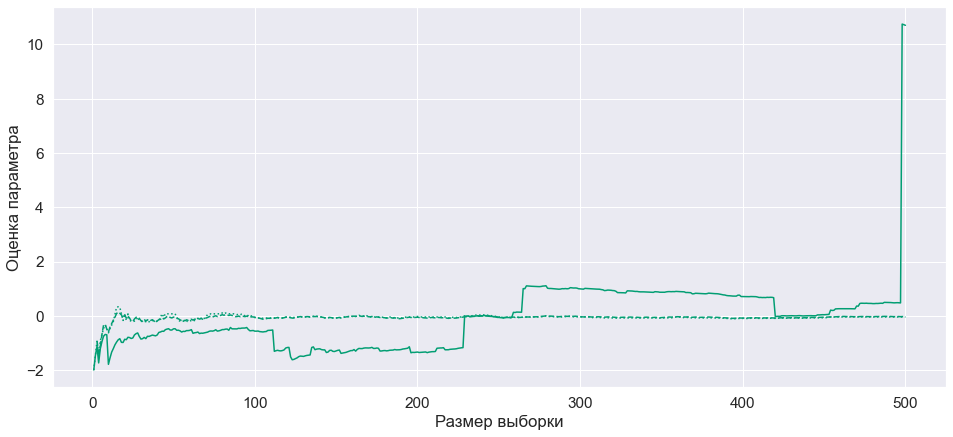

In [84]:
grid = np.linspace(1, N, N) 
plt.figure(figsize=(16, 7))
plt.plot(grid, estimate_cauchy_1, color=color_for_cauchy)
plt.plot(grid, estimate_cauchy_2, color=color_for_cauchy, linestyle="--")
plt.plot(grid, estimate_cauchy_3, color=color_for_cauchy, linestyle=":")
plt.xlabel("Размер выборки")
plt.ylabel("Оценка параметра")
plt.show()

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:** эти три графика показывают, что оценки с меньшей асимптотической дисперсией лучше оценивают нужный параметр. 

# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

In [10]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: C:\Users\79175\Downloads\winequality-red.csv

  0%|          | 0.00/101k [00:00<?, ?B/s]
100%|##########| 101k/101k [00:00<00:00, 948kB/s]
100%|##########| 101k/101k [00:00<00:00, 948kB/s]


In [11]:
import pandas as pd

In [62]:
data = pd.read_csv("winequality-red.csv")

In [63]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [67]:
def alc(alco):
    if (alco<10):
        return "low alcohol"
    elif (alco>12):
        return "high alcohol"
    else:
        return "medium alcohol"
data['category'] = [alc(data['alcohol'][i]) for i in range(1599)]

Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [72]:
res_sug = pd.DataFrame({'Mean':
    pd.Series([np.mean([data['residual sugar'][i] for i in range(1599) if data['category'][i] == 'low alcohol']),
     np.mean([data['residual sugar'][i] for i in range(1599) if data['category'][i] == 'medium alcohol']),
     np.mean([data['residual sugar'][i] for i in range(1599) if data['category'][i] == 'high alcohol'])], 
        index=list(['low alcohol', 'medium alcohol', 'high alcohol'])),
                        'Median':
    [np.median([data['residual sugar'][i] for i in range(1599) if data['category'][i] == 'low alcohol']),
    np.median([data['residual sugar'][i] for i in range(1599) if data['category'][i] == 'medium alcohol']),
     np.median([data['residual sugar'][i] for i in range(1599) if data['category'][i] == 'high alcohol'])]})
res_sug

,Mean,Median
low alcohol,2.457132,2.1
medium alcohol,2.569923,2.2
high alcohol,2.760993,2.3


Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** чем больше алкоголя - тем больше остаточного сахара. В распределении остаточного сахара точно встречаются выбросы в большую сторону, так как для всех категорий вин среднеее заметно больше медианы.

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

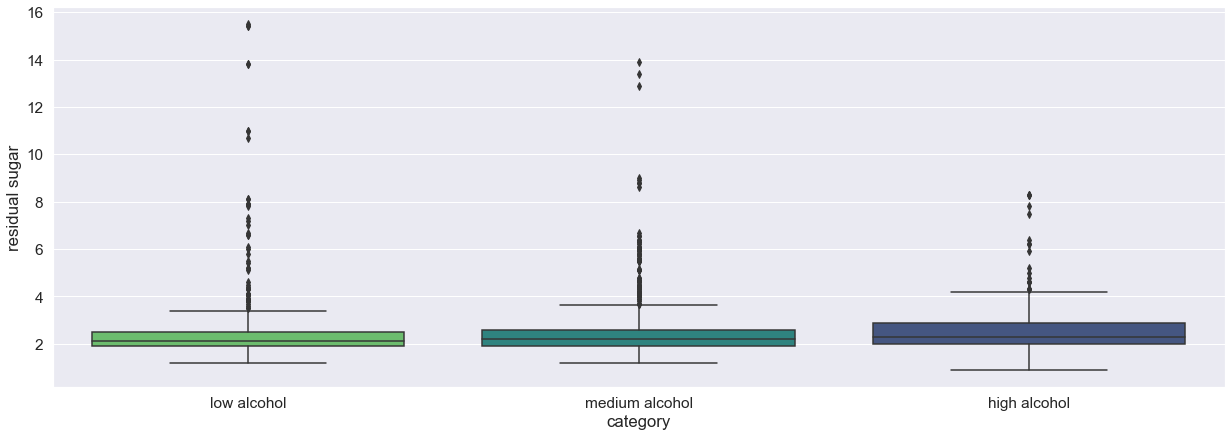

In [88]:
plt.figure(figsize=(21,7))
palette = sns.color_palette("viridis", n_colors=3)[::-1]

sns.boxplot(x='category', y='residual sugar', data=data, palette=palette)
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медииану или среднее? Почему?

**Ответ:** как и из оценок из предыдущего пункта, по графикам видно, что количество остаточного сахара незначительно, но растет при увеличении содержания алкоголя. Так же из графика видно, что выбросов в бОльшую стороны дейт=ствительно много. Именно из-за этих выбросов для оценивания содержания сахара лучше использовать медиану.

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

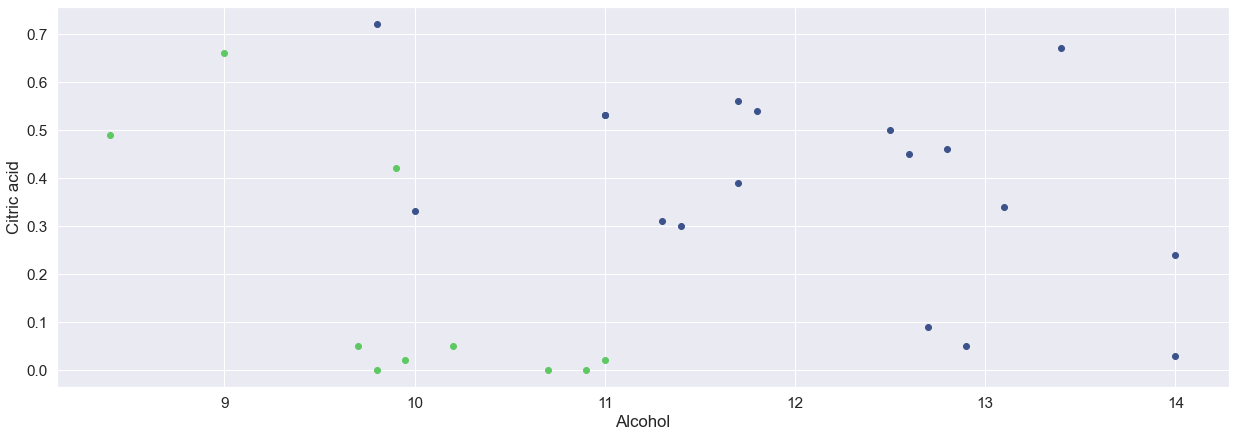

In [93]:
fig = plt.figure(figsize=(21,7))
alc_bad = [data['alcohol'][i] for i in range(1599) if data['quality'][i] == 3]
cit_bad = [data['citric acid'][i] for i in range(1599) if data['quality'][i] == 3]
plt.scatter(alc_bad, cit_bad, color = palette[0])
alc_good = [data['alcohol'][i] for i in range(1599) if data['quality'][i] == 8]
cit_good = [data['citric acid'][i] for i in range(1599) if data['quality'][i] == 8]
plt.scatter(alc_good, cit_good, color = palette[-1])
plt.xlabel("Alcohol")
plt.ylabel("Citric acid")
plt.show()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [102]:
bad_mu = np.array([np.mean(alc_bad), np.mean(cit_bad)])
bad_sigma = np.cov(alc_bad, cit_bad)
good_mu = np.array([np.mean(alc_good), np.mean(cit_good)])
good_sigma = np.cov(alc_good, cit_good)
bad_mul = sps.multivariate_normal(bad_mu, bad_sigma)
good_mul = sps.multivariate_normal(good_mu, good_sigma)

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [103]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

C:\Users\79175\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\79175\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


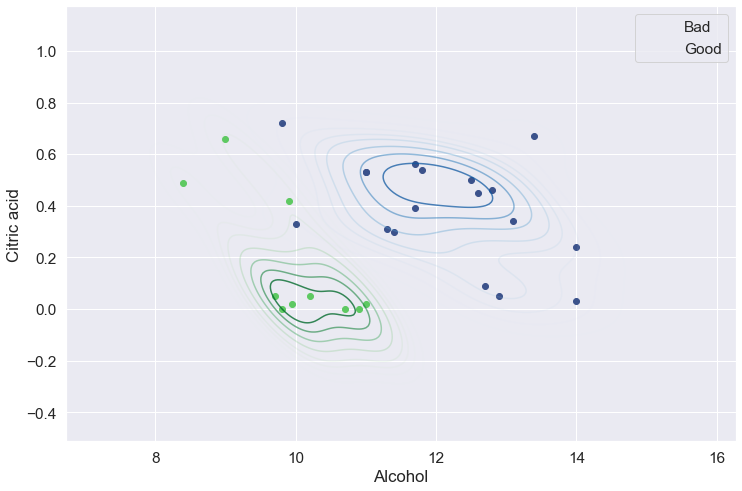

In [117]:
plt.figure(figsize=(12, 8))
with sns.axes_style("darkgrid"):
    ax = sns.kdeplot(alc_bad, cit_bad, 
                     label="Bad", cmap=get_density_cmap("Greens"))
    ax = sns.kdeplot(alc_good, cit_good, 
                     label="Good", cmap=get_density_cmap("Blues"))
    ax = plt.scatter(alc_bad, cit_bad, color = palette[0])
    ax = plt.scatter(alc_good, cit_good, color = palette[-1]);
plt.legend()
plt.xlabel('Alcohol')
plt.ylabel('Citric acid')
plt.show()

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:** У вина с высокими оценками выше содержание алкоголя и лимонной кислоты, границу между очень хорошими и очень плохими винами можно провести по линии алкоголь * лимонная кислота = const. 

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in
    [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии
    произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

Какой можно сделать вывод (напишите в комментариях)?

**Вывод**

 Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (количество бутстрепных выборок равно $1000$) этой эффективной оценки $\theta$.

 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

**Вывод**